In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [11]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
max(data.isnull().sum())

0

In [13]:
data.duplicated().sum()

0

In [14]:
data.shape

(42000, 785)

In [15]:
X = data.drop(columns=['label'])
y = data['label']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=100)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [18]:
max(X_train.iloc[0])

255

9


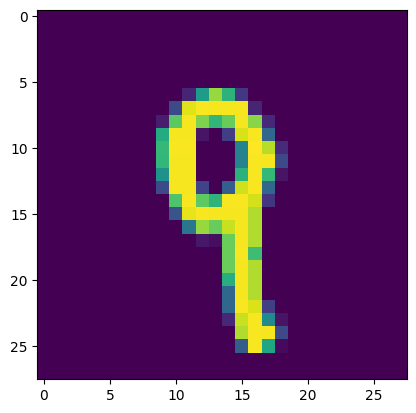

In [19]:
import matplotlib.pyplot as plt
print(y_train.iloc[2])
plt.imshow(np.array(X_train.iloc[2]).reshape(28,28))
plt.show()

In [20]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [21]:
max(X_train_scaled.iloc[0])

1.0

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [50]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 32)               

In [51]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [52]:
history = model.fit(X_train_scaled,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
840/840 [==============================] - 9s 9ms/step - loss: 0.5370 - accuracy: 0.8328 - val_loss: 0.2686 - val_accuracy: 0.9304
Epoch 2/25
840/840 [==============================] - 7s 9ms/step - loss: 0.1823 - accuracy: 0.9536 - val_loss: 0.1666 - val_accuracy: 0.9579
Epoch 3/25
840/840 [==============================] - 7s 9ms/step - loss: 0.1338 - accuracy: 0.9655 - val_loss: 0.1659 - val_accuracy: 0.9624
Epoch 4/25
840/840 [==============================] - 8s 9ms/step - loss: 0.1045 - accuracy: 0.9729 - val_loss: 0.1962 - val_accuracy: 0.9504
Epoch 5/25
840/840 [==============================] - 8s 10ms/step - loss: 0.0881 - accuracy: 0.9760 - val_loss: 0.1540 - val_accuracy: 0.9664
Epoch 6/25
840/840 [==============================] - 8s 9ms/step - loss: 0.0752 - accuracy: 0.9809 - val_loss: 0.1696 - val_accuracy: 0.9661
Epoch 7/25
840/840 [==============================] - 8s 10ms/step - loss: 0.0690 - accuracy: 0.9825 - val_loss: 0.1477 - val_accuracy: 0.9667
Epoc

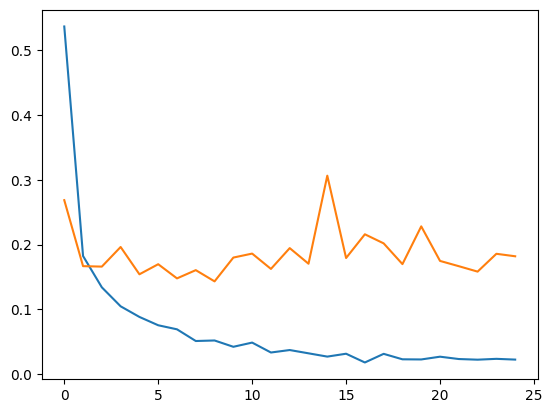

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

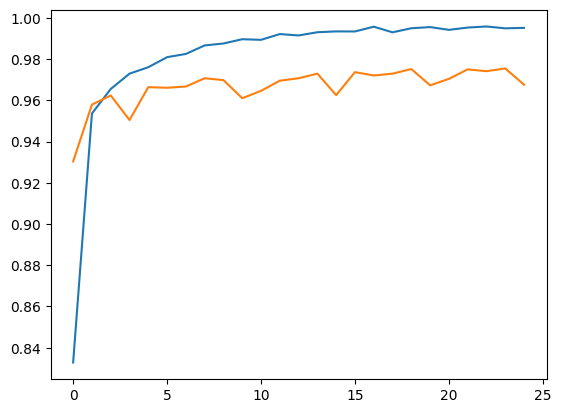

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [55]:
y_pred = model.predict(X_test).argmax(axis=1)
y_pred

263/263 [==============================] - 1s 3ms/step


array([5, 0, 2, ..., 8, 7, 9])

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9660714285714286

In [38]:
sample = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
print(sample.shape)
sample.head()

(28000, 2)


,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [39]:
tester = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
tester.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
tester = tester/255

In [60]:
ans = model.predict(tester).argmax(axis=1)

875/875 [==============================] - 3s 3ms/step


In [61]:
ans

array([2, 0, 9, ..., 3, 9, 2])

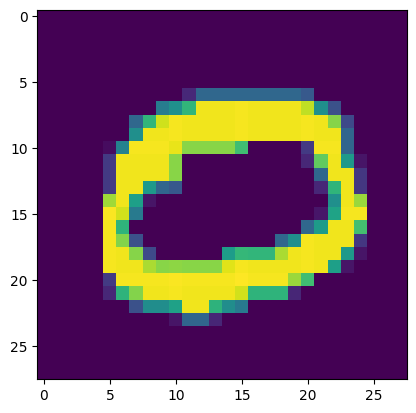

In [62]:
plt.imshow(np.array(tester.iloc[1]).reshape(28,28))

In [63]:
DF = pd.DataFrame(tester.index+1,columns=['ImageId'])
DF['Label'] = ans
print(DF.shape)
DF

(28000, 2)


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [64]:
DF.to_csv('Digit_Ans.csv',index=False)

In [26]:
X.shape

(42000, 784)

In [35]:
X = np.array(X).reshape(42000,28,28,1)
y = np.array(y)
X_model2 = X/255

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,)

In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [32]:
model2 = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [33]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 25)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        14464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 1, 1, 64)         

In [34]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
model2.fit(X_model2,y,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 24s 17ms/step - loss: 0.2705 - accuracy: 0.9173
Epoch 2/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0883 - accuracy: 0.9729
Epoch 3/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0649 - accuracy: 0.9802
Epoch 4/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0516 - accuracy: 0.9837
Epoch 5/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0408 - accuracy: 0.9869
Epoch 6/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0366 - accuracy: 0.9879
Epoch 7/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0284 - accuracy: 0.9907
Epoch 8/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0237 - accuracy: 0.9925
Epoch 9/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0210 - accuracy: 0.9928
Epoch 10/10
1313/1313 [==============================] - 22s 17m

In [41]:
tester_model2 = np.array(tester).reshape(28000,28,28,1)

In [42]:
y_p = model2.predict(tester_model2).argmax(axis=1)

875/875 [==============================] - 5s 6ms/step


In [43]:
y_p

array([2, 0, 9, ..., 3, 9, 2])

In [44]:
DF_model2 = pd.DataFrame(tester.index+1,columns=['ImageId'])
DF_model2['Label'] = y_p
print(DF_model2.shape)
DF_model2

(28000, 2)


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [45]:
DF_model2.to_csv('Digit_Ans_model2.csv',index=False)